In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection  import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
df = pd.read_csv("Telecom_customer_churn.csv")

# EDA

In [3]:
df.shape

(7043, 21)

We have 7043 rows and 21 columns in the dataset

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In the data set we have mostly object data type

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


we can observe standard deviation and mean for the numeric datatype columns

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values in the dataset

In [8]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


There are no duplicate rows in the dataset

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
obj_columns=['customerID', 'gender', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges', 'Churn']
for i in obj_columns:
    print("----"+i+"----\n")
    print(df[i].value_counts())

----customerID----

3961-SXAXY    1
0318-ZOPWS    1
0343-QLUZP    1
1215-FIGMP    1
4682-BLBUC    1
             ..
5574-NXZIU    1
4140-MUHUG    1
8871-JLMHM    1
3442-ZHHCC    1
8999-BOHSE    1
Name: customerID, Length: 7043, dtype: int64
----gender----

Male      3555
Female    3488
Name: gender, dtype: int64
----Partner----

No     3641
Yes    3402
Name: Partner, dtype: int64
----Dependents----

No     4933
Yes    2110
Name: Dependents, dtype: int64
----PhoneService----

Yes    6361
No      682
Name: PhoneService, dtype: int64
----MultipleLines----

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
----InternetService----

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
----OnlineSecurity----

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
----OnlineBackup----

No                     3088
Yes              

We can observe totalcharges column contains numeric value. Therefore it can be converted into float type

# converting datatype of TotalCharges

In [11]:
df['TotalCharges'].replace(" ",np.nan,inplace=True)

In [12]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [13]:
df['TotalCharges'].replace(np.nan,df['TotalCharges'].mean(),inplace=True)

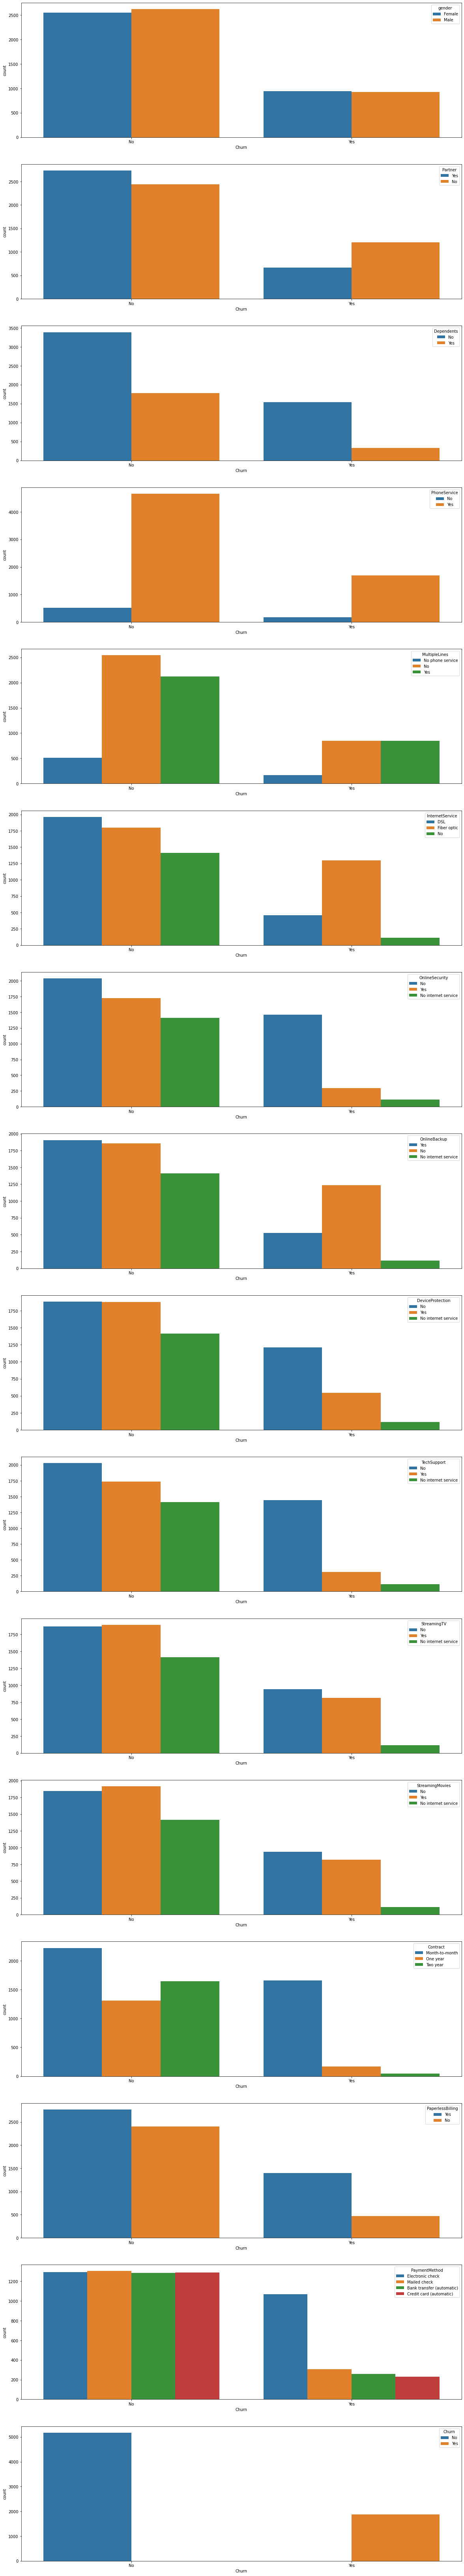

In [14]:
obj_columns= ['gender', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'Churn']
counter=1
plt.figure(figsize=(20,300))
for column in obj_columns:
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.countplot(x='Churn',hue=column,data=df)

    Observations:
        Gender type does not effect churn value
        Consumers with NO partner have churn yes
        Consumers who are not Dependents have more churn as NO
        Consumers with PhonesService have more churn as NO
        Consumers who dont have MultipleLines have churn as NO
        Fiber optic internet service have more churn as Yes
        Consumers with No Online Security have more churn as Yes as compared to other options
        Consumers with No Online Backup have more churn as Yes as compared to other options
        Consumers with No Device Protection have more churn as Yes as compared to other options
        Consumers with No Tech Support have more churn as Yes as compared to other options
        Consumers with Month-to-Month Contract have more churn as Yes as compared to other options
        Paperless Biling have more churn as yes as compared to paperbilling
        Electronic check have more churn as yes as compared to Mailed check, banktransform,credit card
        Churn is highly unbalanced, We will be required to balance the target variable before building variable
        

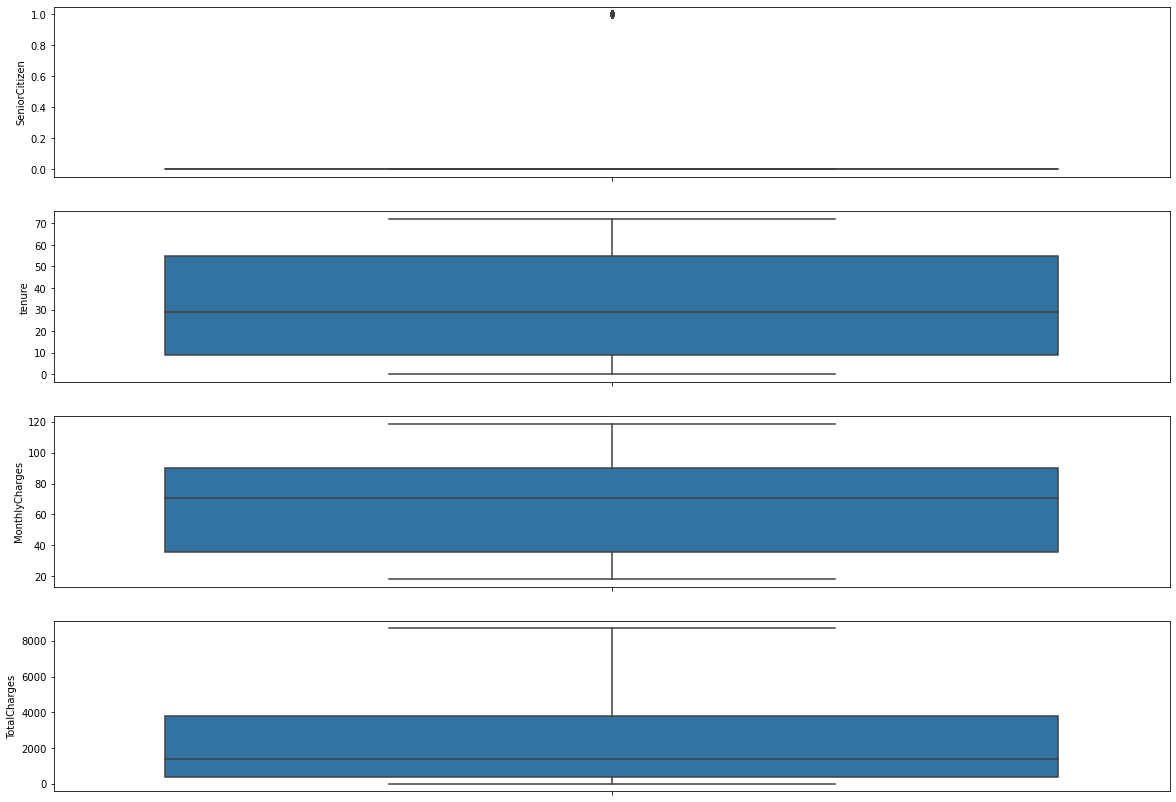

In [15]:

counter=1
plt.figure(figsize=(20,150))
columns = ['SeniorCitizen',
       'tenure', 'MonthlyCharges','TotalCharges']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.boxplot(y=columns[i],hue = columns[i],data=df)
        #sns.boxplot(df[columns[i]])

Outliers are present in Senior Citizen

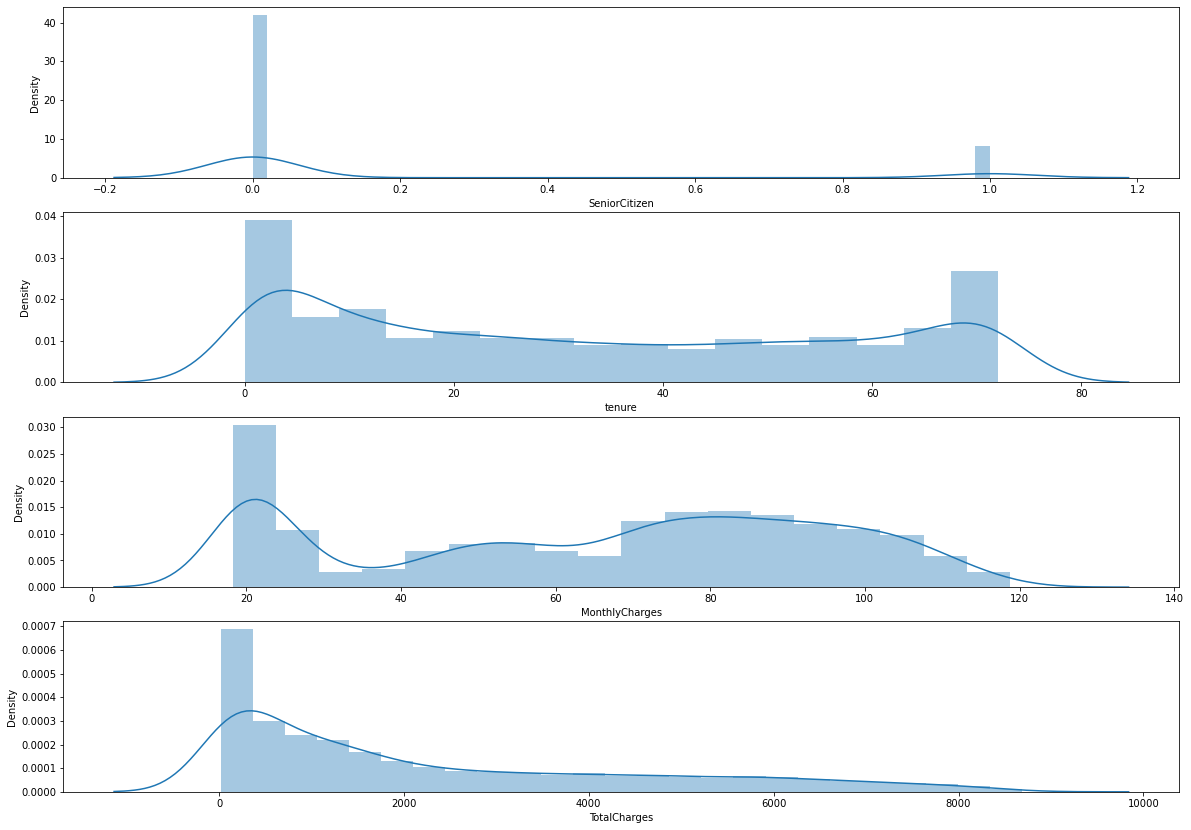

In [16]:

counter=1
plt.figure(figsize=(20,150))
columns = ['SeniorCitizen',
       'tenure', 'MonthlyCharges','TotalCharges']
counter=1;
for i in range(0,len(columns)):
        plt.subplot(40,1,counter)
        counter=counter+1
        sns.distplot(df[columns[i]])

Monthly charges,tenure,Senior citizen  columns are not normally distributed

<AxesSubplot:>

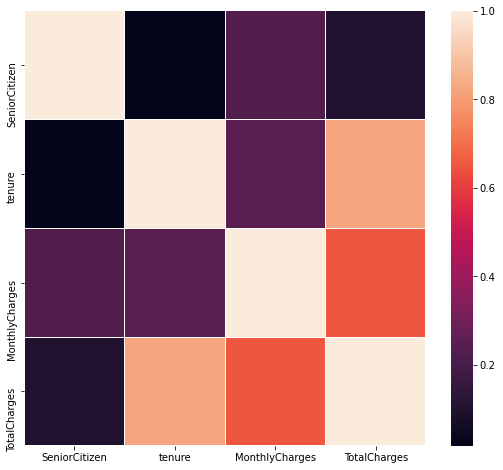

In [17]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, linewidths = 0.1)

We can observe that tenure and total charges show slight correlation, Other Columns does not have correlation

In [18]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

Senior Citizen and Total Charges are highly skewed

# removing not required columns

In [19]:
df.drop(['customerID','SeniorCitizen'],axis=1,inplace=True)

# converting catagorical variables into labels

In [20]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in ['gender', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'Churn']:
    df[col] =  LE.fit_transform(df[col])

In [21]:
fin_df = df.drop(['gender', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'Churn'],axis=1)

# scaling the data

In [22]:
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(fin_df)
final_df = pd.DataFrame(minmax_df, columns = fin_df.columns)

# removing skewness

In [23]:
fin_df_new=power_transform(final_df)
fin_df_new = pd.DataFrame(fin_df_new,columns=final_df.columns)

# Confirming removal of skewness

In [24]:
fin_df_new.skew()

tenure            0.016394
MonthlyCharges   -0.133711
TotalCharges      0.239297
dtype: float64

In [25]:
fin_df_new = fin_df_new.join(df['gender'])
fin_df_new = fin_df_new.join(df['Partner'])
fin_df_new = fin_df_new.join(df['Dependents'])
fin_df_new = fin_df_new.join(df['PhoneService'])
fin_df_new = fin_df_new.join(df['MultipleLines'])
fin_df_new = fin_df_new.join(df['InternetService'])
fin_df_new = fin_df_new.join(df['OnlineSecurity'])
fin_df_new = fin_df_new.join(df['OnlineBackup'])
fin_df_new = fin_df_new.join(df['DeviceProtection'])
fin_df_new = fin_df_new.join(df['TechSupport'])
fin_df_new = fin_df_new.join(df['StreamingTV'])
fin_df_new = fin_df_new.join(df['StreamingMovies'])
fin_df_new = fin_df_new.join(df['Contract'])
fin_df_new = fin_df_new.join(df['PaperlessBilling'])
fin_df_new = fin_df_new.join(df['PaymentMethod'])
fin_df_new = fin_df_new.join(df['Churn'])

# final dataset

In [26]:
fin_df_new.head()

,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,-1.412123,-1.157215,-1.330756,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0.199772,-0.301365,0.151290,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,-1.351794,-0.402907,-1.244685,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0.612219,-0.773117,0.123825,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,-1.351794,0.159682,-1.198043,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


# Train-Test-split

In [27]:
x = fin_df_new.drop(["Churn"],axis=1)
y = fin_df_new["Churn"]

In [28]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if(acc>maxAccu):
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"on Random State",maxRS)

Best Accuracy is 0.7579843860894251 on Random State 158


In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=158)

# SMOTE

In [30]:
print("Before OverSampling '1': {}".format(sum(y_train == 1)))
print("Before OverSampling '0': {} \n".format(sum(y_train == 0)))
  

sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print("After OverSampling '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling '0': {}".format(sum(y_train_res == 0)))

Before OverSampling '1': 1493
Before OverSampling '0': 4141 

After OverSampling '1': 4141
After OverSampling '0': 4141


# Model Building

----------Logistic Regression----------

In [31]:

LogReg = LogisticRegression()
LogReg.fit(x_train,y_train)
pred = LogReg.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1033
           1       0.73      0.52      0.60       376

    accuracy                           0.82      1409
   macro avg       0.78      0.72      0.74      1409
weighted avg       0.81      0.82      0.81      1409



----------Decision tree----------

In [32]:

DTC = DecisionTreeClassifier()
DTC.fit(x_train_res,y_train_res)
pred = DTC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1033
           1       0.51      0.60      0.55       376

    accuracy                           0.74      1409
   macro avg       0.68      0.70      0.69      1409
weighted avg       0.76      0.74      0.75      1409



----------random forest----------

In [33]:

RFC = RandomForestClassifier()
RFC.fit(x_train_res,y_train_res)
pred = RFC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1033
           1       0.60      0.61      0.60       376

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



----------naive bayes----------

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_res, y_train_res)
pred = gnb.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)


              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1033
           1       0.53      0.78      0.63       376

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



---------- SVM----------

In [35]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)

clf.fit(x_train_res, y_train_res.ravel()) 
pred = clf.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1033
           1       0.55      0.77      0.64       376

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409



----------Cross Validation score----------

In [36]:

print(cross_val_score(DTC,x,y,cv=5).mean())

0.7278148993483451


Decision tree - 0.7278148993483451

In [37]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.7867387613717013


Random Forest - 0.7867387613717013

In [38]:
print(cross_val_score(LogReg,x,y,cv=5).mean())

0.8034931689141235


Logistic regression - 0.8034931689141235

In [39]:
print(cross_val_score(gnb,x,y,cv=5).mean())

0.7549338868636685


Naive Bayes - 0.7549338868636685

In [40]:
print(cross_val_score(clf,x,y,cv=5).mean())

0.8016482918252791


SVM - 0.8016482918252791

    Observations:
        Logistic Regression : 0.82 - 0.80 = 0.02
        Decision Tree : 0.74-0.72 = 0.02
        Random Forest : 0.79-0.78 =0.01
        Naive Bayes :  0.76-0.75 = 0.01
        SVM : 0.77-0.80 = 0.03
        
        We can see that f1 score, precision of the Logistic regression is better than other algos, Hence we will use Logistic regression for hyper tuning, We can confirm the best model using AUC-ROC curve at the end

# Hyper parameter tuning

In [41]:
from sklearn.model_selection import GridSearchCV

In [45]:
parameter = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'solver' : ['lbfgs', 'liblinear', 'sag', 'saga'],
    'fit_intercept' :[True,False],
    'C': [0.1,1,10,100,]
    
}
GCV = GridSearchCV(LogisticRegression(),parameter,cv=5)


In [46]:
GCV.fit(x_train_res,y_train_res)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']})

In [47]:
GCV.best_params_

{'C': 0.1, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}

# Building final model

In [48]:
Final_model = LogisticRegression(C= 0.1, fit_intercept= True, penalty= 'l2', solver= 'liblinear')
Final_model.fit(x_train_res,y_train_res)
pred = Final_model.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1033
           1       0.56      0.75      0.64       376

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.80      0.77      0.78      1409



We can observe that precision for 0 and recall for 1 has improved after hyperparamtertuning

# AUC-ROC curve

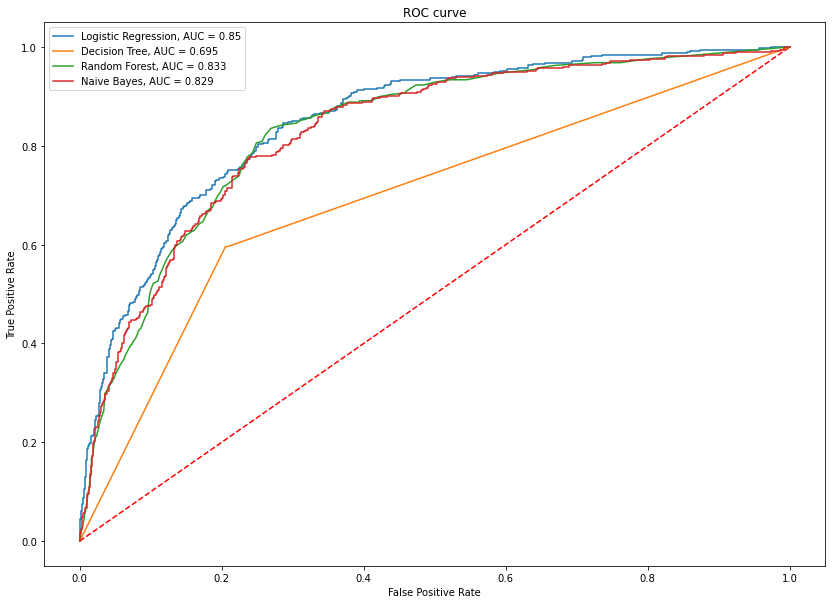

In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fig = plt.figure(figsize=(14,10))
plt.plot([0, 1], [0, 1],'r--')
#KNN

#Logistic Regression
preds_proba_lg = Final_model.predict_proba(x_test)
probslg = preds_proba_lg[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probslg)
auclg = roc_auc_score(y_test, probslg)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclg,3))}')

#Decision Tree Classifier
preds_proba_DTC = DTC.predict_proba(x_test)
probsDTC = preds_proba_DTC[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsDTC)
aucDTC = roc_auc_score(y_test, probsDTC)
plt.plot(fpr, tpr, label=f'Decision Tree, AUC = {str(round(aucDTC,3))}')

#Random Forest
preds_proba_RFC = RFC.predict_proba(x_test)
probsRFC = preds_proba_RFC[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsRFC)
aucRFC = roc_auc_score(y_test, probsRFC)
plt.plot(fpr, tpr, label=f'Random Forest, AUC = {str(round(aucRFC,3))}')

#Naive Bayes
preds_proba_gnb = gnb.predict_proba(x_test)
probsgnb = preds_proba_gnb[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsgnb)
aucgnb = roc_auc_score(y_test, probsgnb)
plt.plot(fpr, tpr, label=f'Naive Bayes, AUC = {str(round(aucgnb,3))}')


plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

We can finalize that Logistic regression is performing better than other models

# Saving the model

In [51]:
import joblib
joblib.dump(Final_model,"Telecom churn.pkl")


['Telecom churn.pkl']